In [35]:
import pandas as pd

This tutorial uses the Titanic data set, stored as CSV. The data consists of the following data columns:

* PassengerId: Id of every passenger.

* Survived: Indication whether passenger survived. 0 for yes and 1 for no.

* Pclass: One out of the 3 ticket classes: Class 1, Class 2 and Class 3.

* Name: Name of passenger.

* Sex: Gender of passenger.

* Age: Age of passenger in years.

* SibSp: Number of siblings or spouses aboard.

* Parch: Number of parents or children aboard.

* Ticket: Ticket number of passenger.

* Fare: Indicating the fare.

* Cabin: Cabin number of passenger.

* Embarked: Port of embarkation.

In [36]:
titanic = pd.read_csv("titanic.csv")
titanic.head() # note that i have named the DataFrame 'tc' for 'titanic'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How do I select a subset of a DataFrame?
#### How do I select specific columns from a DataFrame?

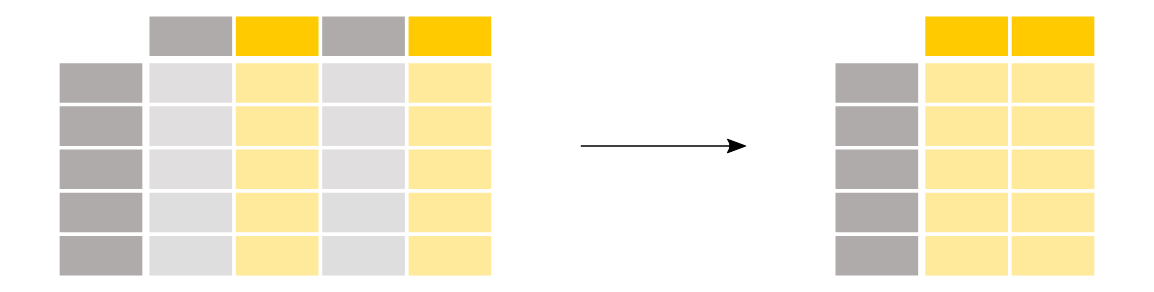

I’m interested in the age of the Titanic passengers.

In [37]:
ages = titanic["Age"]
print(ages)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


To select a single column, use square brackets [] with the column name of the column of interest. 
Each column in a DataFrame is a Series. As a single column is selected, the returned object is a pandas Series. We can verify this by checking the type of the output:

In [38]:
type(ages)

pandas.core.series.Series

And we can have a look at the shape of the output:

In [39]:
ages.shape

(891,)

`DataFrame.shape` is an attribute of a pandas Series and DataFrame, containing the number of rows and columns (nrows, ncolumns). 

A pandas `Series` is a 1-D data constructand so *only* the number of rows is returned 

I’m interested in the age and sex of the Titanic passengers.

In [40]:
age_sex = titanic[["Age","Sex"]]

In [41]:
age_sex.head(7)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
5,NaN,male
6,54.0,male


To select *multiple columns*, **use a list of column names** within the selection brackets []

Note: The inner square brackets define a Python list with column names, whereas the outer brackets are used to select the data from a pandas DataFrame as seen in the previous example.

In [42]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [43]:
titanic[["Age", "Sex"]].shape



(891, 2)

The selection returned a DataFrame with 891 rows and 2 columns. Remember, a DataFrame is 2-dimensional with both a row and column dimension.

## How do I filter specific rows from a DataFrame?

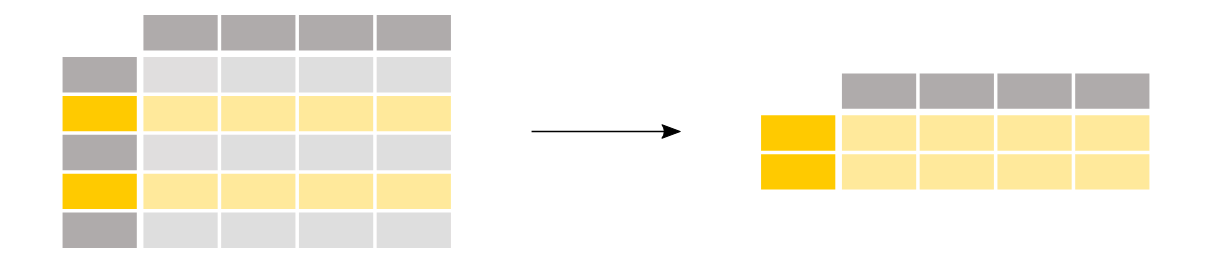

I’m interested in the passengers older than 35 years.

In [44]:
above_35 = titanic[titanic["Age"]>35]
above_35.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


To select rows based on a conditional expression, use a condition inside the selection brackets []

The condition inside the selection brackets titanic["Age"] > 35 checks for which rows the Age column has a value larger than 35:

In [45]:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

The output of the conditional expression (>, but also ==, !=, <, <=,… would work) is actually a pandas Series of boolean values (either True or False) with the same number of rows as the original DataFrame. Such a Series of boolean values can be used to filter the DataFrame by putting it in between the selection brackets []. Only rows for which the value is True will be selected.

We know from before that the original Titanic DataFrame consists of 891 rows. Let’s have a look at the number of rows which satisfy the condition by checking the shape attribute of the resulting DataFrame above_35:

In [46]:
above_35.shape


(217, 12)

Let's say now that we're interested in only the Titanic passengers from cabin class 2 and 3.


In [47]:
class_23 = titanic[titanic["Pclass"].isin([2,3])]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


##### Like the conditional expression before, `isin()` is a **conditional function** that returns `True` for each row row in the specified Series or list. 
- To filter the rows based on the `conditional function`, use the conditional function *inside* the selection brackets `[]`.
- Here, the condition inside the selection brackets `titanic["Pclass"].isin([2,3])` checks for which rows the `Pclass` column is either 2 or 3.
- This is the same as filtering by rows for which the class is either 2 or 3 and combining the two statements with an `|` (or) operator

In [48]:
# i.e.
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

In [49]:
class_23.head()
class_23.shape

(675, 12)

**NOTE**: When combining multiple conditions, each condition must be wrapped in parentheses `()`. 
            AND we cannot use the standard python `or/and` operators but instead must use the `|` / `&` operators


###### Now, let's imagine we want only the passenger data for which the age is known...

In [50]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The `notna()` is another conditional pandas function. 
* it returns `True` for each row where the specified column values are not `Null`.
* Thus, it can be combined with selection brackets `[]` to filter the data table

Since the data displayed by the `head()` method looks very similar, one way we can check if it has actually changed is by checking the shape. 

In [51]:
age_no_na.shape


(714, 12)

### How do I select specific rows and columns from a DataFrame?

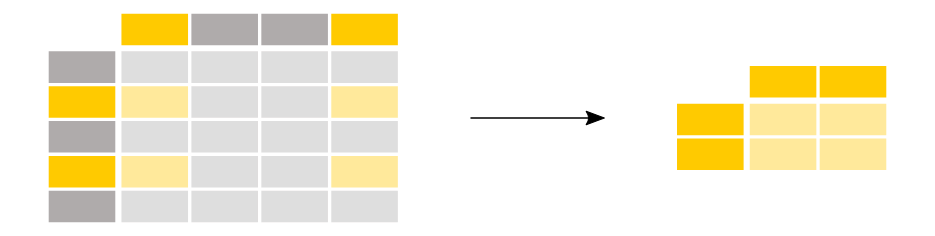

Now, we are interested in only the names of passengers who are *older than 35 years*...

In [52]:
adult_names = titanic.loc[titanic["Age"]> 35, "Name"]
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                              Bonnell, Miss Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

Here, a **subset** of both rows and columns is created, and just using selection brackets `[]` is not sufficient.

The `loc/iloc` operators are required **in front** of the selection brackets `[]`. 

When using `loc` & `iloc`, the e.g. `loc[a, b]`:
- a = rows desired
- b = columns desired
- when using column names, use `loc` (locate)
    - for `a` and `b`, you can use:
        - single string label
        - a list of string labels
        - conditional expression
        - a colon (specifies that you want to select **all** *rows or columns*.

Now, i'm interested in rows 10 to 25 & 3 to 5. 

In [53]:
titanic.iloc[9:25, 2:5] # as standard in python, the selection range is end-exclusive i.e. only up to the 24th row and 4 column will be displayed 

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss Marguerite Rut",female
11,1,"Bonnell, Miss Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


Again, a **subset** of both rows and columns has been created in one go, but just using `[]` for selection is not enough. 

When specifically interested in rows or columns based on position within the data set/table, use `iloc` -- think of `iloc` as *integer-locate* or *index-locate*

And, when selecting specific rows and/or columns with `iloc` or `iloc`, new values can be assigned to the selected data. 

E.g. let's assign `anonymous` to the first 3 elements of the fourth column

In [54]:
titanic.iloc[0:3, 3] = "anonymous"

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### A Recap of `loc` and `iloc`:

In [56]:
# df.iloc[500]
# returns the 501st row (indexing starts from 0). Note that specifying a dimension for the columns is optional.
# df.iloc[500, 3]
# retrieves the 501st row, column number 3. Multiple columns can also be specified:
# df.iloc[500, [0,1,3]]
# This is done using a list within the column dimension.

# Slicing is also possible.
# df.iloc[:500, [0,1,3]]
# shows the first 500 rows for columns 0, 1, and 3. Note: Observations with row number 501 are excluded because slicing excludes the last number (i.e.,
# :500
# means from 0 to 499).

 

# The distinction with
# loc
# lies in its use of indexes.
# df.loc[:500]
# could yield the same results as
# df.iloc[:500]
# if indexes are integers in ascending order. However, if any index differs from the integer ordering, the results will not match. Dates can also be used as indexes.

 

# Note: Slicing with
# loc
# includes both the starting and ending points (unlike
# iloc
# , which excludes the ending point).

#### REMEMBER: 
* When selecting *subsets* of data, `[]` are used
    * Inside these brackets, we can use single col/row label
    * A list of col/row labels
    * A slice of labels
    * A conditional expression
    * A colon.
* Select specific rows and columns using `loc` with their specific `string` names
* Select specififc rows and columns using `iloc` with their positions in the table
* You can assign new `values` to a seelction with `iloc`/`loc`